In [ ]:
import numpy as np
import pandas as pd
import math
import csv
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/customer_features_scaled.csv')
df.head(10)

,CustomerID,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
0,000nan,4.984467,1.506343,-0.268408,4.595722,2.432481,4.773105,2.067962,2.330682,3.094080,0.761335,0.914696,2.100059,2.332104,1.979686,-0.076864,2.392380
1,012346,3.789233,-2.120154,3.800623,3.161700,-1.158633,-2.296006,-1.015864,-2.307499,-2.100457,8.847780,3.719362,7.377665,-2.141668,3.384916,3.763263,3.337067
2,012747,0.879252,0.879583,1.007144,1.397472,1.532615,0.156943,1.957285,-0.614124,0.749921,-0.306106,0.973710,0.485241,1.078802,1.041469,0.667948,1.526344
3,012748,3.038005,-0.106556,-1.068898,2.706127,2.352800,3.983682,1.982065,0.343236,1.872665,-0.238979,-0.080428,-0.710410,-0.049208,0.348309,-0.892187,-0.000881
4,012749,0.982814,1.125208,0.282588,1.379978,0.890138,1.397000,0.537992,1.095989,1.056342,0.756329,0.259518,1.527988,1.056653,-0.159892,0.290885,0.329836
5,012820,0.466642,-0.817031,-0.019920,0.296923,0.656870,0.395429,-0.412569,-0.123289,-0.824860,0.189404,-0.105017,-0.181951,-0.935154,0.238579,0.003600,-0.128951
6,012821,-1.233887,-0.235351,-0.060898,-1.725684,-1.158633,-1.361354,-1.015864,-1.051000,-0.261189,-0.848867,-0.151699,-1.489691,-0.233985,0.110322,-0.025617,-0.255883
7,012822,0.268811,-0.078187,0.286568,0.302366,-0.198605,0.135925,-0.081936,0.397982,-0.164225,0.676729,0.348066,0.785080,-0.141162,0.261716,0.260265,0.220589
8,012823,-0.366422,1.825216,2.528634,0.774998,0.890138,-2.296006,2.064151,-2.307499,1.669397,-1.283030,2.429015,0.374043,1.836621,2.299290,2.554670,2.796227
9,012824,-0.360106,-0.204132,-0.026684,-0.409951,-1.158633,-0.284543,-1.015864,0.500258,-0.231237,0.478007,-0.117808,0.540661,-0.202481,-0.149025,0.009031,-0.221666


In [ ]:
X = df.drop(columns=['CustomerID'])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)   # hoặc 2, 3, 10
X_pca = pca.fit_transform(X)
print("X_pca shape:", X_pca.shape)
print("Số chiều sau PCA:", X_pca.shape[1])

X_pca shape: (3921, 5)
Số chiều sau PCA: 5


⚠️ Data lớn (3921). Đã sample 1000 điểm để vẽ dendrogram.


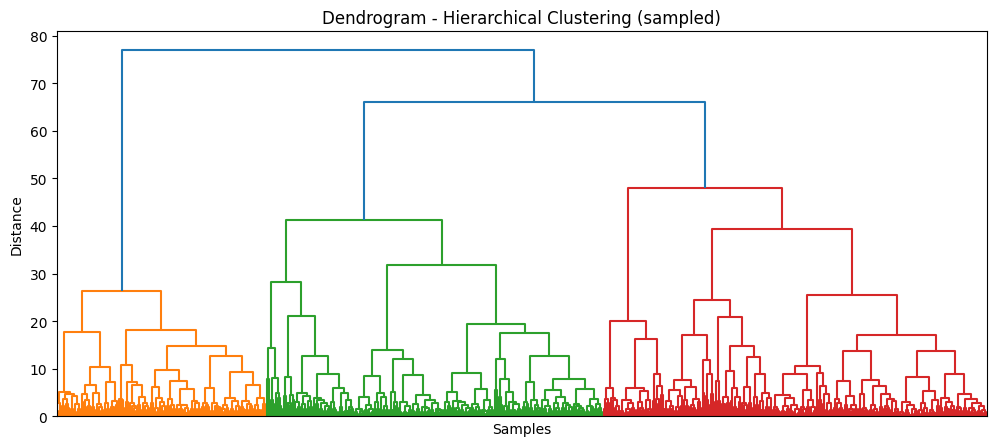

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage


def plot_dendrogram_safe(X_for_dendro, method="ward", sample_size=1000, random_state=42):
    n = X_for_dendro.shape[0]
    if n > sample_size:
        rng = np.random.RandomState(random_state)
        idx = rng.choice(n, size=sample_size, replace=False)
        X_small = X_for_dendro[idx]
        print(f"⚠️ Data lớn ({n}). Đã sample {sample_size} điểm để vẽ dendrogram.")
    else:
        X_small = X_for_dendro
        print(f"Data nhỏ ({n}). Vẽ dendrogram toàn bộ.")

    Z = linkage(X_small, method=method)

    plt.figure(figsize=(12, 5))
    dendrogram(Z, no_labels=True, color_threshold=None)
    plt.title("Dendrogram - Hierarchical Clustering (sampled)")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()

# Vẽ dendrogram trên không gian PCA (khuyến nghị)
plot_dendrogram_safe(X_pca, method="ward", sample_size=1000)



In [ ]:
min_k = 2
max_k = 10

sil_scores = []
dbi_scores = []
K_range = list(range(min_k, max_k + 1))

for k in K_range:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward',metric='euclidean',
    distance_threshold=None,
    compute_full_tree='auto'
)
    labels = model.fit_predict(X_pca)

    sil = silhouette_score(X_pca, labels)
    dbi = davies_bouldin_score(X_pca, labels)

    sil_scores.append(sil)
    dbi_scores.append(dbi)

    print(f"k={k} → Silhouette={sil:.4f}, DBI={dbi:.4f}")


k=2 → Silhouette=0.2153, DBI=1.4747
k=3 → Silhouette=0.1892, DBI=1.4309
k=4 → Silhouette=0.1900, DBI=1.4406
k=5 → Silhouette=0.1785, DBI=1.4779
k=6 → Silhouette=0.1808, DBI=1.4716
k=7 → Silhouette=0.1661, DBI=1.4436
k=8 → Silhouette=0.1643, DBI=1.3735
k=9 → Silhouette=0.1190, DBI=1.4862
k=10 → Silhouette=0.1158, DBI=1.5887


In [ ]:
best_k_sil = K_range[int(np.argmax(sil_scores))]
best_k_dbi = K_range[int(np.argmin(dbi_scores))]

print("\n=========================")
print("SỐ CỤM TỐI ƯU")
print("=========================")
print(f"Theo Silhouette → k = {best_k_sil}")
print(f"Theo DBI        → k = {best_k_dbi}")

# Gợi ý chọn cuối cùng:
best_k = best_k_sil   # hoặc tự chọn best_k_dbi
print(f"=> Số cụm khuyên dùng: k = {best_k}")



SỐ CỤM TỐI ƯU
Theo Silhouette → k = 2
Theo DBI        → k = 8
=> Số cụm khuyên dùng: k = 2


In [ ]:
final_model = AgglomerativeClustering(n_clusters=best_k, linkage="ward")
final_labels = final_model.fit_predict(X_pca)

unique, counts = np.unique(final_labels, return_counts=True)
print("\nKích thước từng cụm:")
for u, c in zip(unique, counts):
    print(f"Cluster {u}: {c}")



Kích thước từng cụm:
Cluster 0: 2988
Cluster 1: 933


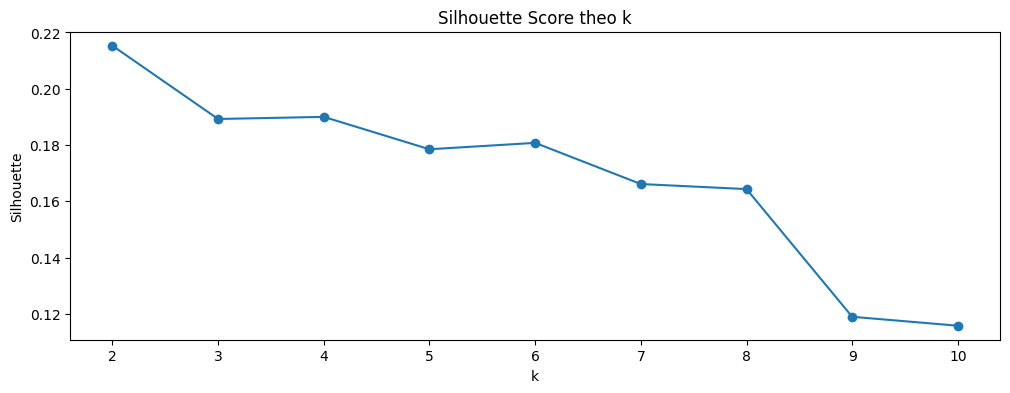

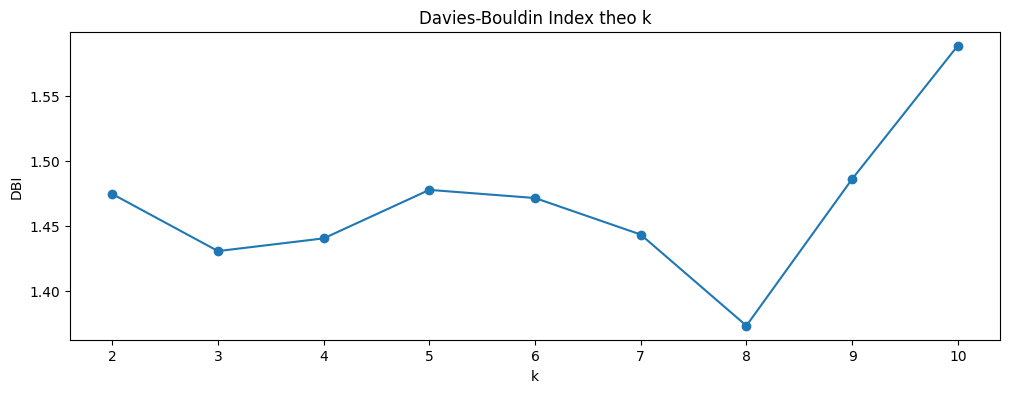

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(K_range, sil_scores, marker='o')
plt.title("Silhouette Score theo k")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(K_range, dbi_scores, marker='o')
plt.title("Davies-Bouldin Index theo k")
plt.xlabel("k")
plt.ylabel("DBI")
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(
    n_clusters=4,
    metric='euclidean',
    linkage='ward',
    distance_threshold=None,
    compute_full_tree='auto'
)
model.fit(X)


AgglomerativeClustering(n_clusters=4)